In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy ,SparseCategoricalCrossentropy
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow import keras	 as k	
import numpy as np
# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from xgboost import *
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [33]:
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import PIL
import torch
from torch.utils.data import DataLoader
from torch import nn
import matplotlib as mpl


In [51]:
mpl.rcParams['axes.grid'] = False
mpl.rcParams['image.interpolation'] = 'nearest'
mpl.rcParams['figure.figsize'] = 15, 25
def show_dataset(dataset, n=6):
  img = np.vstack((np.hstack((np.asarray(dataset[i][0]) for _ in range(n)))
                   for i in range(10)))
  plt.imshow(img)
  plt.axis('off')

In [56]:
transform = transforms.Compose([
    
    transforms.RandomResizedCrop(size=225),
    transforms.RandomHorizontalFlip(),
#transforms.RandomHorizontalFlip(),
#transforms.RandomRotation(20),
    transforms.RandomRotation(degrees=360),
    #transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
 transforms.TrivialAugmentWide(), 

])


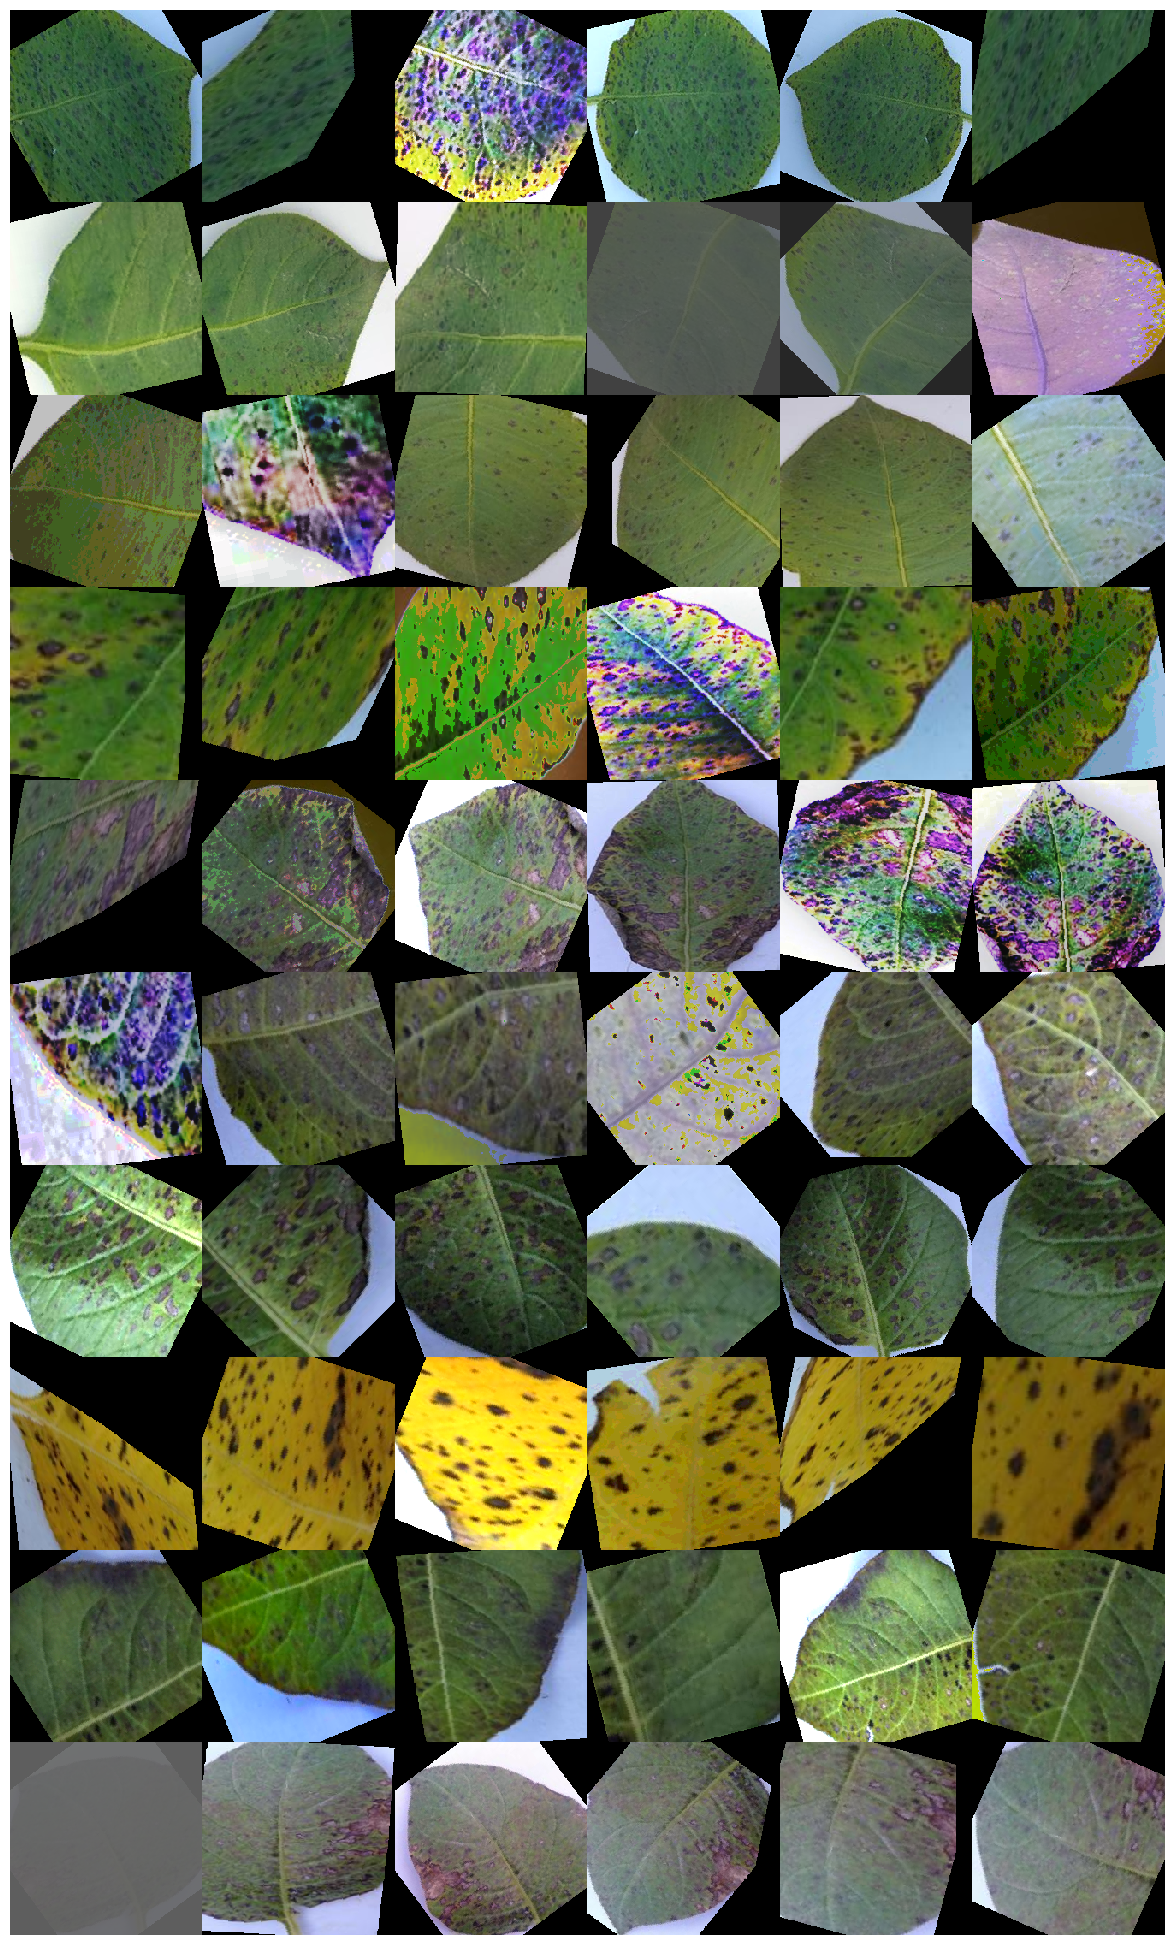

In [57]:

train=ImageFolder("/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Training",transform=transform)
show_dataset(train)

In [58]:
transform = transforms.Compose([
    transforms.RandomResizedCrop(size=225),
    transforms.RandomHorizontalFlip(),
#transforms.RandomHorizontalFlip(),
#transforms.RandomRotation(20),
    transforms.RandomRotation(degrees=360),
    #transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
 transforms.TrivialAugmentWide(),
    transforms.ToTensor()
])


In [59]:
train=ImageFolder("/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Training",transform=transform)
valid=ImageFolder("/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Validation",transform=transform)
test=ImageFolder("/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Testing",transform=transform)

In [60]:
train=DataLoader(train,shuffle=True,batch_size=64)
test=DataLoader(test,shuffle=True,batch_size=64)
valid=DataLoader(valid,shuffle=True,batch_size=64)

In [67]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        self.model =nn.Sequential(
                                nn.BatchNorm2d(3),
nn.Conv2d(3,16, kernel_size=3),            nn.ReLU(),

                   # nn.ReLU()
                    nn.BatchNorm2d(16)
                     ,nn.MaxPool2d(2)
                                  
                    ,nn.Conv2d(16,32, kernel_size=3)
                   ,            nn.ReLU(),

                   # nn.ReLU()
                    nn.BatchNorm2d(32)
                    ,nn.MaxPool2d(2)
                      ,nn.Conv2d(32,64, kernel_size=3)
                                  ,            nn.ReLU(),

                   # nn.ReLU()
                    nn.BatchNorm2d(64)
                    ,nn.MaxPool2d(2     )
                    ,nn.Conv2d(64,128, kernel_size=3)
                   ,            nn.ReLU(),

                   # nn.ReLU()
                    nn.BatchNorm2d(128)
                                  
                    ,nn.MaxPool2d(2)
                    ,nn.Flatten()
                    ,nn.Linear(18432 ,30),
            nn.ReLU(),
                    nn.Linear(30,3),
                   )

    def forward(self, x):
        return self.model(x)


In [68]:
model=CNNModel().cuda()
loss=nn.CrossEntropyLoss()
optim=torch.optim.Adam(model.parameters(),lr=0.001)
s=torch.optim.lr_scheduler.ReduceLROnPlateau(optim,verbose=True)

In [69]:

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


In [70]:
ls_train=[]
ls_valid=[]
for i in range(100):
    l_train=0
    model.train()
    w=0
    a_t=0
    for (inputs,labels) in train:
        y_p=model(inputs.cuda())
        l=loss(y_p,labels.cuda())
        optim.zero_grad()
        l.backward()
        optim.step()
        l_train+=l.item()      

        a=accuracy(y_p,labels.cuda())
        w+=1
        a_t+=a
        print(f'\rEpoch {(i + 1)/100} , Batch {w + 1}/{len(train)}, Loss: {l } , accuracy {a}', end='')

    l_valid=0
    model.eval()
    a_valid=0
    with torch.no_grad():
      for (inputs,labels) in valid:
                y_p=model(inputs.cuda()) 
                l=loss(y_p,labels.cuda())
                l_valid+=l.item()
                a=accuracy(y_p,labels.cuda())
                a_valid+=a  
    ls_train.append(l_train/len(train)  )
    ls_valid.append(l_valid/len(valid) )
    s.step(l_train/len(train) )                
    print(f"\r loss train :" ,l_train/len(train ), " accuracy :" ,a_t/len(train)," loss valid :" ,l_valid/len(valid) , " accuracy :" ,a_valid/len(valid))                    

 loss train : 1.20708120804207  accuracy : tensor(0.4566)  loss valid : 1.0539604340280806  accuracy : tensor(0.4196)
 loss train : 0.9701508073245778  accuracy : tensor(0.5318)  loss valid : 0.932309797831944  accuracy : tensor(0.5759)
 loss train : 0.902064955702015  accuracy : tensor(0.5664)  loss valid : 0.8569441437721252  accuracy : tensor(0.5714)
 loss train : 0.842622601518444  accuracy : tensor(0.6026)  loss valid : 0.7917458159582955  accuracy : tensor(0.6362)
 loss train : 0.7777925834936255  accuracy : tensor(0.6442)  loss valid : 0.7741063152040754  accuracy : tensor(0.6362)
 loss train : 0.793219081327027  accuracy : tensor(0.6498)  loss valid : 0.7621984566961016  accuracy : tensor(0.6763)
 loss train : 0.6915604086483226  accuracy : tensor(0.6976)  loss valid : 0.6667466844831195  accuracy : tensor(0.6786)
Epoch 0.08 , Batch 5/51, Loss: 0.5920594930648804 , accuracy 0.765625

KeyboardInterrupt: 

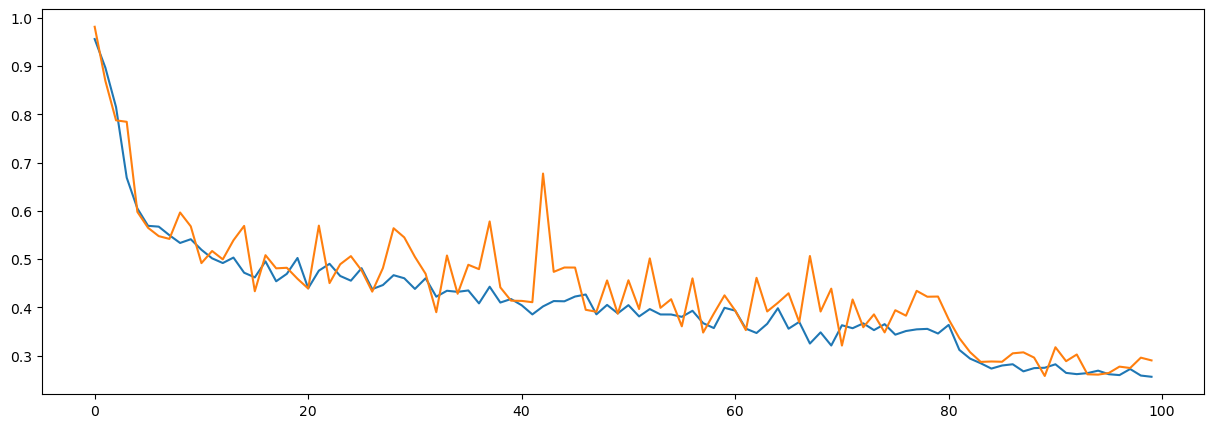

In [323]:
mpl.rcParams['axes.grid'] = False
mpl.rcParams['image.interpolation'] = 'nearest'
mpl.rcParams['figure.figsize'] = 15, 5
plt.plot(range(100),ls_train,label='train')
plt.plot(range(100),ls_valid,label='val')
plt.legend()

In [317]:
a_test=0
with torch.no_grad():
      for (inputs,labels) in test:
                y_p=model(inputs.cuda()) 
                l=loss(y_p,labels.cuda())
                l_valid+=l.item()
                a=accuracy(y_p,labels.cuda())
                a_test+=a  

In [318]:
print('accuracy',((a_test/len(test)).item()))

accuracy 0.8993409872055054


In [6]:
transform = transforms.Compose([ 
   # transforms.RandomResizedCrop(size=225),
    transforms.RandomHorizontalFlip(),
#transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=360),
    #transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
 transforms.TrivialAugmentWide(),
   transforms.ToTensor(),
])
transform2 = transforms.Compose([ 
   # transforms.RandomResizedCrop(size=225),
   transforms.ToTensor(),
])


In [8]:
train=ImageFolder("/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Training",transform=transform)
valid=ImageFolder("/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Validation",transform=transform2)
test=ImageFolder("/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Testing",transform=transform2)
train=DataLoader(train,shuffle=True,batch_size=64)
test=DataLoader(test,shuffle=True,batch_size=64)
valid=DataLoader(valid,shuffle=True,batch_size=64)

In [9]:
class CNNModel2(nn.Module):
    def __init__(self):
        super(CNNModel2, self).__init__()

        self.model =nn.Sequential(
                                nn.BatchNorm2d(3),
nn.Conv2d(3,32, kernel_size=3),                    nn.ReLU(),

                   # nn.ReLU()
                    nn.BatchNorm2d(32)
                     ,nn.MaxPool2d(2)
                                  
                    ,nn.Conv2d(32,64, kernel_size=3)
                   ,                    nn.ReLU(),

                   # nn.ReLU()
                    nn.BatchNorm2d(64)
                    ,nn.MaxPool2d(2)
                      ,nn.Conv2d(64,64, kernel_size=3)
                                  ,                    nn.ReLU(),

                   # nn.ReLU()
                    nn.BatchNorm2d(64)
                    ,nn.MaxPool2d(2 )
                    ,nn.Conv2d(64,128, kernel_size=3)
                   ,                    nn.ReLU(),

                   # nn.ReLU()
                    nn.BatchNorm2d(128)
                                  
                    ,nn.MaxPool2d(2)
                    ,nn.Flatten()
                    ,nn.Linear( 25088 ,200)
                    ,
                                   nn.BatchNorm1d(200)

                    ,     nn.ReLU(),
                    nn.Linear(200,3),
                   )

    def forward(self, x):
        return self.model(x)


In [364]:
model2=CNNModel2().cuda()
optim=torch.optim.Adam(model2.parameters())
sl=torch.optim.lr_scheduler.ReduceLROnPlateau(optim)

In [365]:
ls_train=[]
ls_valid=[]
for i in range(100):
    l_train=0
    model.train()
    w=0
    a_t=0
    for (inputs,labels) in train:
        y_p=model2(inputs.cuda())
        l=loss(y_p,labels.cuda())
        optim.zero_grad()
        l.backward()
        optim.step()
        l_train+=l.item()      

        a=accuracy(y_p,labels.cuda())
        w+=1
        a_t+=a
        print(f'\rEpoch {(i + 1)/100} , Batch {w + 1}/{len(train)}, Loss: {l } , accuracy {a}', end='')

    l_valid=0
    model.eval()
    a_valid=0
    with torch.no_grad():
      for (inputs,labels) in valid:
                y_p=model2(inputs.cuda()) 
                l=loss(y_p,labels.cuda())
                l_valid+=l.item()
                a=accuracy(y_p,labels.cuda())
                a_valid+=a  
    ls_train.append(l_train/len(train)  )
    ls_valid.append(l_valid/len(valid) )
    s.step(l_train/len(train) )                
    print(f"\r loss train :" ,l_train/len(train ), " accuracy :" ,a_t/len(train)," loss valid :" ,l_valid/len(valid) , " accuracy :" ,a_valid/len(valid))                    

Epoch 0.01 , Batch 52/51, Loss: 0.7871076464653015 , accuracy 0.6470588445663452Epoch 00111: reducing learning rate of group 0 to 1.0000e-05.
 loss train : 0.8908880306225196  accuracy : tensor(0.5917)  loss valid : 0.6812177555901664  accuracy : tensor(0.6741)
 loss train : 0.6848527882613388  accuracy : tensor(0.7076)  loss valid : 0.6124566878591265  accuracy : tensor(0.7165)
 loss train : 0.5958138417963889  accuracy : tensor(0.7478)  loss valid : 0.48762433018003193  accuracy : tensor(0.8147)
 loss train : 0.5214665754168641  accuracy : tensor(0.7868)  loss valid : 0.4208475777081081  accuracy : tensor(0.8482)
 loss train : 0.4387907432574852  accuracy : tensor(0.8208)  loss valid : 0.35131360590457916  accuracy : tensor(0.8661)
 loss train : 0.3989378126228557  accuracy : tensor(0.8411)  loss valid : 0.3793326126677649  accuracy : tensor(0.8504)
 loss train : 0.34601624514542373  accuracy : tensor(0.8611)  loss valid : 0.254232651421002  accuracy : tensor(0.9040)
 loss train : 0.

KeyboardInterrupt: 

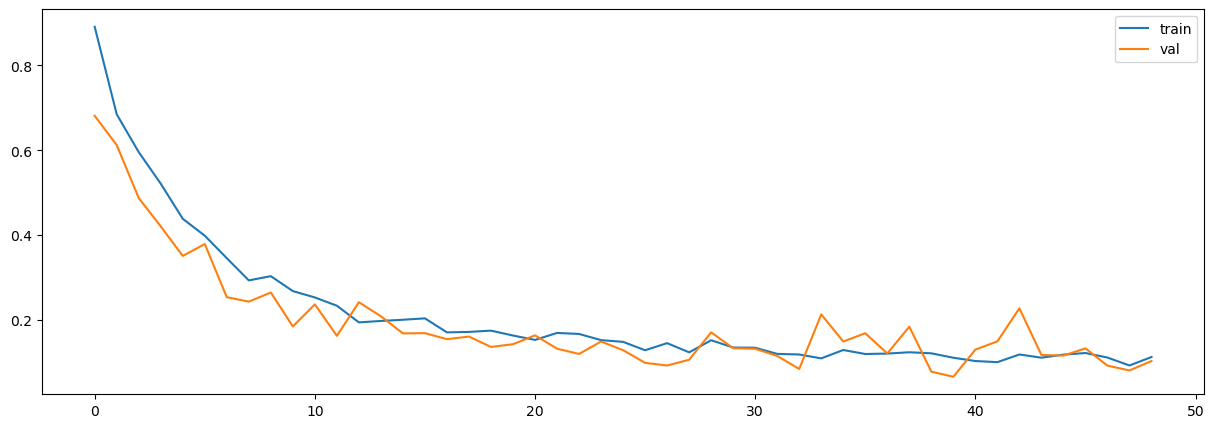

In [374]:
plt.plot(range(len(ls_train)),ls_train,label="train")
plt.plot(range(len(ls_valid)),ls_valid,label="val")
plt.legend()

In [414]:
a_test=0
y_true=[]
y_prdict=[]
model.eval()
with torch.no_grad():
      for (inputs,labels) in test:
                y_p=model2(inputs.cuda()/255) 
                l=loss(y_p,labels.cuda())
                l_valid+=l.item()
                a=accuracy(y_p,labels.cuda())
                a_test+=a  
                y_true+=labels
                y_prdict+=torch.max(y_p.cpu(),1)[1]
print('accuracy',((a_test/len(test)).item()))

accuracy 0.9708758592605591


In [10]:
from sklearn.metrics import classification_report


In [418]:
print(classification_report(np.array(y_prdict),np.array(y_true)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       159
           1       0.95      0.96      0.96       101
           2       0.99      0.96      0.97       145

    accuracy                           0.97       405
   macro avg       0.97      0.97      0.97       405
weighted avg       0.97      0.97      0.97       405

